# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [13]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values # we use 3:-1 (excluding -1) as the first three columns are irrelavent for finding and 
                                 # the last column is the target variable
y = dataset.iloc[:, -1].values

In [14]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [15]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [17]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)


In [19]:
print(X)
print(X[:5])

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]]


### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [22]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [23]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the second hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the output layer

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Binary classification

## Part 3 - Training the ANN

### Compiling the ANN

In [26]:
ann.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [27]:
ann.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5417 - loss: 0.6954
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.4829  
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - loss: 0.4382  
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8178 - loss: 0.4101  
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8265 - loss: 0.4096  
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8308 - loss: 0.4023  
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8453 - loss: 0.3728  
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8486 - loss: 0.3624   
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8461 - loss: 0.3691  
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8510 - loss: 0.3624    
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8478 - loss: 0.3630  
Epoch 12/50
250/250 ━━━━━━━━━

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Extra**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [30]:
input_data = np.array([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])

### Predicting the Test set results

In [31]:
prediction = ann.predict(input_data)
predicted_class = (prediction > 0.5).astype(int)
print("Predicted Output:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Output: [[1]]


### Making the Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


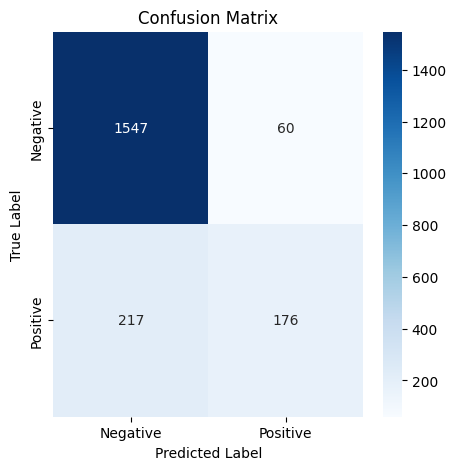

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = ann.predict(X_test)  

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

write down about precision recall f1-score, why is it better than just accuracy, what are some other interesting metrics u can find

1. Precision: (True Positives/ All positives) Measures how many of the predicted churners actually churned.
2. Recall: (True positives/true positves + false negatives) Measures how many actual churners were correctly identified.
3. F1-score: (Harmonic mean of precision and recall) Balances precision & recall (useful when false positives & false negatives are costly).

As the churn dataset conatins more nonchurn than churn values, it is imbalanced. In such cases it is better to use other metrics to analyse the result properly.

Another interesting metric I found was
ROC-AUC Score: Evaluates how well the model separates churners from non-churners at various thresholds.
the dataset has imbalanced classes (e.g., more non-churners than churners), accuracy will be high even if the model predicts only non-churners.
ROC AUC considers both false positives & false negatives, giving a more reliable measure.